### Importing required libraries

In [166]:
import numpy as np                                                        # For pre-preocessing data
import pandas as pd                                                       # For pre-preocessing data
import matplotlib.pyplot as plt                                           # For visualisation
import seaborn as sns                                                     # For visualisation
from sklearn.metrics import classification_report,confusion_matrix        # For Performance metrics 
from sklearn.model_selection import cross_validate                        # For cross validation scores
from sklearn.model_selection import cross_val_score                       # For cross validation scores
from sklearn.metrics import confusion_matrix                              # For confusion matrixes
import os                                                                 # For changing home directory
from sklearn.model_selection import train_test_split                      # For train test split

'''
Althouggh we have already imported all the necesssary libraries here, 
we will again import these in this notebook again whereever they are used just to show in which step these are used.
In a real scenario, we don't need to import again and again 
'''

"\nAlthouggh we have already imported all the necesssary libraries here, \nwe will again import these in this notebook again whereever they are used just to show in which step these are used.\nIn a real scenario, we don't need to import again and again \n"

### Changing Home directory

In [167]:
print('Current working directory is ----    '+ os.getcwd())
os.chdir("D:\\Relevel\\Week 14_Day3")
print('Changed working directory is ----    '+ os.getcwd())

Current working directory is ----    D:\Relevel\Week 14_Day3
Changed working directory is ----    D:\Relevel\Week 14_Day3


### Reading CSV data file 

The file contains characteristics data about 3168 voice samples for Males and Females.
There are 20 Features and 1 Target variable
Target variable is binary - Male/Female


In [168]:
voice = pd.read_csv("D:\\Relevel\\Week 14_Day3\\voice.csv")
voice.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


### Objective 

The Objective of this exercise is to train a model which predicts whether a voice sample belongs to a Male or a Female


### Exploring data 

In [169]:
voice.shape

(3168, 21)

In [170]:
voice.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


In [171]:
voice.corr()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
meanfreq,1.000000,-0.739039,0.925445,0.911416,0.740997,-0.627605,-0.322327,-0.316036,-0.601203,-0.784332,0.687715,1.000000,0.460844,0.383937,0.274004,0.536666,0.229261,0.519528,0.515570,-0.216979
sd,-0.739039,1.000000,-0.562603,-0.846931,-0.161076,0.874660,0.314597,0.346241,0.716620,0.838086,-0.529150,-0.739039,-0.466281,-0.345609,-0.129662,-0.482726,-0.357667,-0.482278,-0.475999,0.122660
median,0.925445,-0.562603,1.000000,0.774922,0.731849,-0.477352,-0.257407,-0.243382,-0.502005,-0.661690,0.677433,0.925445,0.414909,0.337602,0.251328,0.455943,0.191169,0.438919,0.435621,-0.213298
Q25,0.911416,-0.846931,0.774922,1.000000,0.477140,-0.874189,-0.319475,-0.350182,-0.648126,-0.766875,0.591277,0.911416,0.545035,0.320994,0.199841,0.467403,0.302255,0.459683,0.454394,-0.141377
Q75,0.740997,-0.161076,0.731849,0.477140,1.000000,0.009636,-0.206339,-0.148881,-0.174905,-0.378198,0.486857,0.740997,0.155091,0.258002,0.285584,0.359181,-0.023750,0.335114,0.335648,-0.216475
IQR,-0.627605,0.874660,-0.477352,-0.874189,0.009636,1.000000,0.249497,0.316185,0.640813,0.663601,-0.403764,-0.627605,-0.534462,-0.222680,-0.069588,-0.333362,-0.357037,-0.337877,-0.331563,0.041252
skew,-0.322327,0.314597,-0.257407,-0.319475,-0.206339,0.249497,1.000000,0.977020,-0.195459,0.079694,-0.434859,-0.322327,-0.167668,-0.216954,-0.080861,-0.336848,-0.061608,-0.305651,-0.304640,-0.169325
kurt,-0.316036,0.346241,-0.243382,-0.350182,-0.148881,0.316185,0.977020,1.000000,-0.127644,0.109884,-0.406722,-0.316036,-0.194560,-0.203201,-0.045667,-0.303234,-0.103313,-0.274500,-0.272729,-0.205539
sp.ent,-0.601203,0.716620,-0.502005,-0.648126,-0.174905,0.640813,-0.195459,-0.127644,1.000000,0.866411,-0.325298,-0.601203,-0.513194,-0.305826,-0.120738,-0.293562,-0.294869,-0.324253,-0.319054,0.198074
sfm,-0.784332,0.838086,-0.661690,-0.766875,-0.378198,0.663601,0.079694,0.109884,0.866411,1.000000,-0.485913,-0.784332,-0.421066,-0.362100,-0.192369,-0.428442,-0.289593,-0.436649,-0.431580,0.211477


### Checking Null values and data types

In [172]:
voice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

Conclusion - There are no null values

### Replacing Target Variable values with 0 and 1 because this binary forms is compatible with most algorithms

In [173]:
voice.label = [1 if each == "female" else 0 for each in voice.label]

In [174]:
voice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   int6

Observation - The Target variable datatype has changed to int64

### Preparing Test and Train data 

Segregating Target variable and features into x and y 

In [175]:
#We should have x and y values for test-train datas.
y = voice.label.values
x = voice.drop(["label"],axis=1)

#### Normalizing features as it is required for Logistic Regression and KNN 

In [176]:
from sklearn.preprocessing import MinMaxScaler

scaler_minmax = MinMaxScaler()
x_normalised = scaler_minmax.fit_transform(x)


#### Performing Train test split finally with 80/20 ratio. 

In [177]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_normalised,y,test_size=0.2,random_state = 100)
#test_size=0.2 means %20 test datas, %80 train datas


# 1. Logistic Regression

Training our Logistic Regresion model using  LogisticRegression() function of sklearn library. 

Just like last session, GridSearchCV is used for Hyperparameter tuning and 10-Cross Validation. 

In case of logistic regression, the parameters are :
* Penalty : Whether to use Ridge or Lasso regularisation. The ideal value is found as per iterative process in GridSearchCV
* C -Value : Strength of regularisation. A high value of C gives more weight to training data. A lower C value means that the                data might not represent real world data and less importance is given to data. The ideal value is found as per                  iterative process in GridSearchCV

In [178]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

log_reg = LogisticRegression()
grid_values = {'penalty': ['l1','l2'], 'C': [0.001,0.01,0.1,1,10,100,1000,10000]}
log_reg_model=GridSearchCV(log_reg,grid_values,scoring=('accuracy'),cv=10)
log_reg_model.fit(x_train,y_train)


C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_valida

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy')

The best parameters and corresponding Accuracy score can be checked with the best_params_ & best_score_ attributes of GridSearchCV object.
In the case below we can see that the best C value is 1000 and type of regularization chosen is l2 regularization. 

The corresponding accuracy is 97.6%

In [179]:
print(log_reg_model.best_params_)
print(log_reg_model.best_score_)

{'C': 1000, 'penalty': 'l2'}
0.9755314182565125


#### Confusion Matrix

The confusion matrix can be plotted as per below code - 

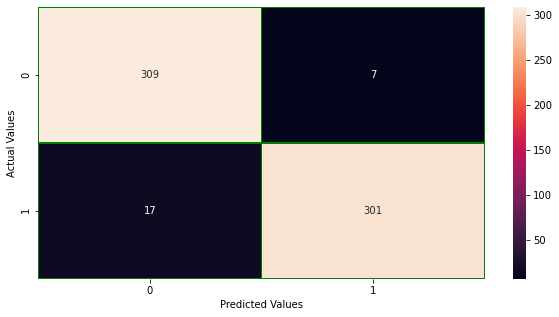

In [180]:
y_pred = classification_model.predict(x_test)                                    # Predicting for test data
conf_mat = confusion_matrix(y_test,y_pred)                                       # Getting confusuion matrix 

#Visualization Confusion Matrix
f, ax = plt.subplots(figsize=(10,5))
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="green",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

#### Checking Performance 

cross_validate can be used to get score values for our model.
The reuqired score metric can be passed in scoring parameter. 
Please check sklearn documentation in below link to know what all values this parameter can take- 

https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

In [181]:
scores_log_reg=cross_validate(log_reg_model,x_test,y_test,scoring=(['accuracy', 'precision','recall','f1']),cv=10)

C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_valida

In [182]:
scores_log_reg

{'fit_time': array([6.63990235, 7.82417035, 5.50360227, 6.27212834, 7.64228415,
        5.58155513, 7.23153615, 6.43102813, 7.8441596 , 5.5315845 ]),
 'score_time': array([0.01598954, 0.0089922 , 0.00999308, 0.0089941 , 0.0089922 ,
        0.00799465, 0.00699615, 0.00899434, 0.01299024, 0.00899458]),
 'test_accuracy': array([0.953125  , 0.984375  , 0.953125  , 0.953125  , 0.98412698,
        0.96825397, 0.96825397, 0.95238095, 0.95238095, 0.96825397]),
 'test_precision': array([0.96774194, 0.96969697, 0.96774194, 0.93939394, 1.        ,
        1.        , 0.96875   , 0.96774194, 1.        , 0.96875   ]),
 'test_recall': array([0.9375    , 1.        , 0.9375    , 0.96875   , 0.96774194,
        0.93548387, 0.96875   , 0.9375    , 0.90625   , 0.96875   ]),
 'test_f1': array([0.95238095, 0.98461538, 0.95238095, 0.95384615, 0.98360656,
        0.96666667, 0.96875   , 0.95238095, 0.95081967, 0.96875   ])}

In [183]:
print("Mean training time is :      "+ str(scores_log_reg['fit_time'].mean()))
print("Mean Accuracy is :           "+ str(scores_log_reg['test_accuracy'].mean()))
print("Mean Precision is :          "+ str(scores_log_reg['test_precision'].mean()))
print("Mean Recall is :             "+ str(scores_log_reg['test_recall'].mean()))
print("Mean F1 is :                 "+ str(scores_log_reg['test_f1'].mean()))

Mean training time is :      6.6501950979232785
Mean Accuracy is :           0.9637400793650792
Mean Precision is :          0.9749816715542522
Mean Recall is :             0.9528225806451612
Mean F1 is :                 0.9634197291779258


# 2. Decision Tree

Training our Decision Tree model using DecisionTreeClassifier() function of sklearn library.

Just like other cases, GridSearchCV is used for Hyperparameter tuning and 10-Cross Validation.

In case of Decision trees, the parameters are :

* criterion : Whether to use Gini Index or Entropy for measuring Impurity. The ideal value is found as per iterative process in GridSearchCV
* max_depth : The maximu depth at which a node will be mapped as a leaf node. The ideal value is found as per iterative process in GridSearchCV

There are many other parameters also, which can be explored on sklearn documentation here - 

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [184]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

decision_tree = DecisionTreeClassifier()

tree_parameters = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}
decision_tree_model=GridSearchCV(decision_tree,tree_parameters,scoring=('accuracy'),cv=10)
decision_tree_model.fit(x_train,y_train)


print(decision_tree_model.best_params_)
print(decision_tree_model.best_score_)

{'criterion': 'entropy', 'max_depth': 5}
0.9719865550403037


Observation - Entropy is chosen as the Impurity measurement metric and max depth is chosen as 5 by GridSearchCV

#### Confusion Matrix

The confusion matrix can be plotted as per below code -

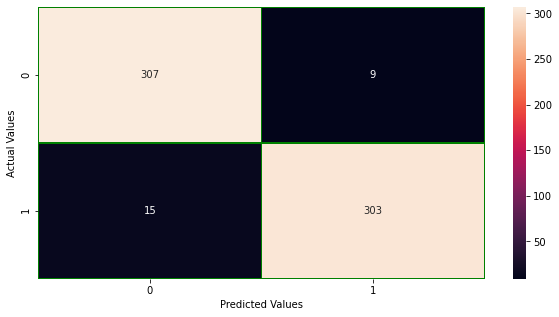

In [185]:
y_pred = decision_tree_model.predict(x_test)                                    # Predicting for test data
conf_mat = confusion_matrix(y_test,y_pred)                                       # Getting confusuion matrix 

#Visualization Confusion Matrix
f, ax = plt.subplots(figsize=(10,5))
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="green",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

#### Checking Performance 

cross_validate can be used to get score values for our model.
The reuqired score metric can be passed in scoring parameter. 
Please check sklearn documentation in below link to know what all values this parameter can take- 

https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

In [186]:
scores_dtree=cross_validate(decision_tree_model,x_test,y_test,scoring=(['accuracy', 'precision','recall','f1']),cv=10)
scores_dtree

{'fit_time': array([6.40504456, 6.78081608, 6.18018508, 6.38805389, 6.52996755,
        5.50660133, 5.4406395 , 5.46362805, 5.02791095, 5.76444221]),
 'score_time': array([0.02198672, 0.00899291, 0.0239861 , 0.01499414, 0.01199293,
        0.00899434, 0.01199245, 0.01299143, 0.01397634, 0.01199269]),
 'test_accuracy': array([0.953125  , 0.953125  , 0.953125  , 0.953125  , 0.98412698,
        0.98412698, 0.95238095, 0.96825397, 0.9047619 , 0.9047619 ]),
 'test_precision': array([0.93939394, 0.93939394, 0.93939394, 0.91428571, 0.96875   ,
        1.        , 0.93939394, 1.        , 1.        , 0.93333333]),
 'test_recall': array([0.96875   , 0.96875   , 0.96875   , 1.        , 1.        ,
        0.96774194, 0.96875   , 0.9375    , 0.8125    , 0.875     ]),
 'test_f1': array([0.95384615, 0.95384615, 0.95384615, 0.95522388, 0.98412698,
        0.98360656, 0.95384615, 0.96774194, 0.89655172, 0.90322581])}

In [187]:
print("Mean training time is :      "+ str(scores_dtree['fit_time'].mean()))
print("Mean Accuracy is :           "+ str(scores_dtree['test_accuracy'].mean()))
print("Mean Precision is :          "+ str(scores_dtree['test_precision'].mean()))
print("Mean Recall is :             "+ str(scores_dtree['test_recall'].mean()))
print("Mean F1 is :                 "+ str(scores_dtree['test_f1'].mean()))


Mean training time is :      5.948728919029236
Mean Accuracy is :           0.9510912698412698
Mean Precision is :          0.9573944805194806
Mean Recall is :             0.9467741935483872
Mean F1 is :                 0.9505861503559079


Observation : 

Logistic regression performace scores are better than decision tree. But the time taken by Logistic regression is significantly higher than Decision Trees. 
 

### Visualising Decision Trees

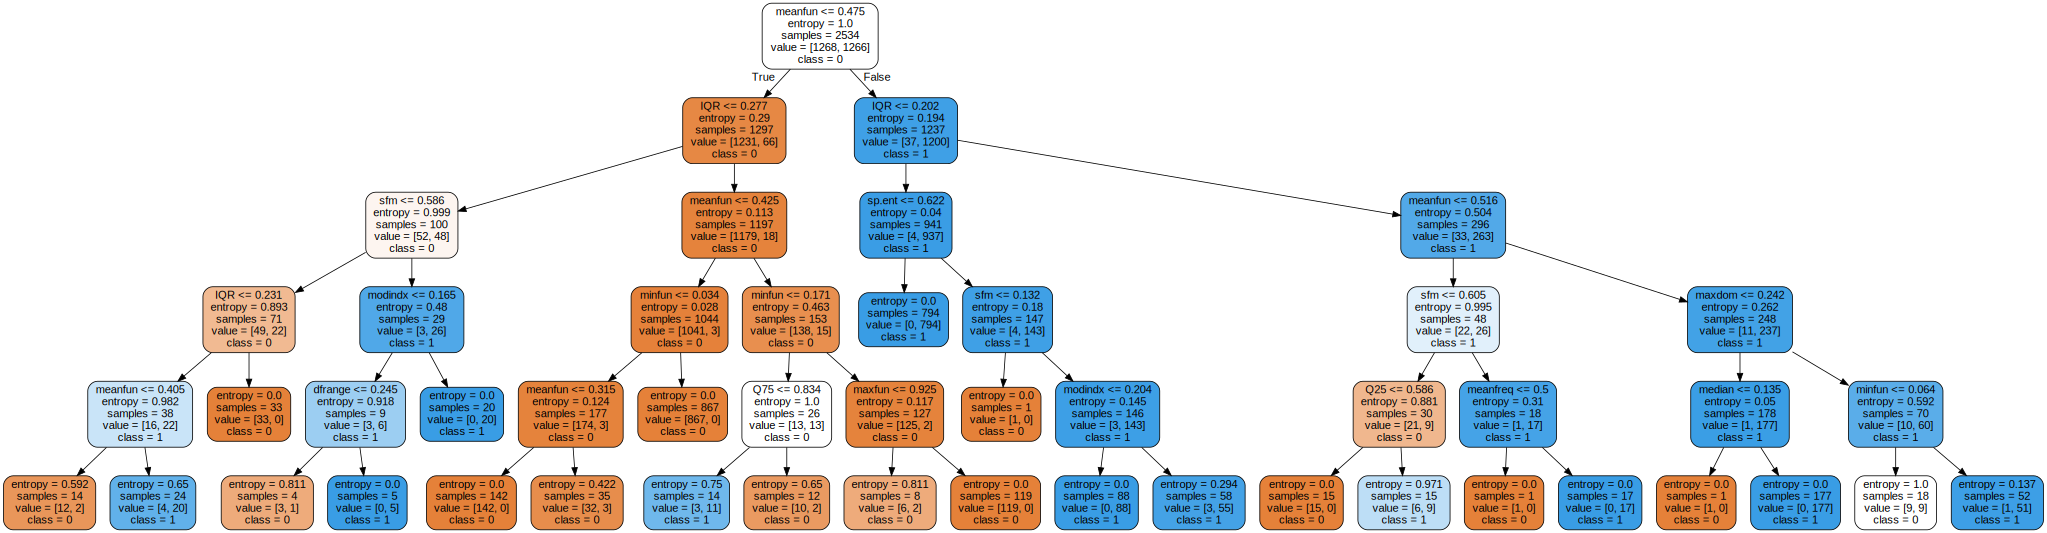

In [188]:
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(decision_tree_model.best_estimator_, out_file=None, 
            filled=True, rounded=True, feature_names=x.columns, class_names=['0','1','2'])
graph = graphviz.Source(dot_data)  
graph      

In [189]:
from graphviz import Source
graph = Source(dot_data)
graph.format = 'png'
graph.render('Voice_decisiontree',view=True)

'Voice_decisiontree.png'

# 3. KNN Classifier

Training our KNN model using KNeighborsClassifier() function of sklearn library.

GridSearchCV is used for Hyperparameter tuning and 10-Cross Validation.

In case of KNN, few of the parameters are :

* n_neighbors : It is the K value, which dictates how many nearest neighbours should be considered for prediction. The ideal value is found as per iterative process in GridSearchCV
* metric : The distance metric. It can be Euclidean/Manhattan etc. By defalt it is minkowski.  The ideal value is found as per iterative process in GridSearchCV

There are many other parameters also, which can be explored on sklearn documentation here - 

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [190]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

k_values = list(range(3, 30))
knn_parms = dict(n_neighbors=k_values, metric =['euclidean','manhattan','minkowski'] )
  
# defining parameter range
knn_model = GridSearchCV(knn, knn_parms, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
  
# fitting the model for grid search
knn_model.fit(x_train, y_train)

print(knn_model.best_params_)
print(knn_model.best_score_)

Fitting 10 folds for each of 81 candidates, totalling 810 fits
{'metric': 'manhattan', 'n_neighbors': 3}
0.9798699075659021


### Visualising K-Values vs Accuracy 

This is another method of chosing appropriate K value.
GridsearchCV for KNN might sometimes give really low values of K , which may cause Overfitting.

Hence from a graph as shown below, a realtively higher K with similar accuracy can be chosen 

In [191]:
accuracy_rate = []

for i in range(1,50):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,x_train,y_train,cv=10)
    accuracy_rate.append(score.mean())

Text(0, 0.5, 'Accuracy')

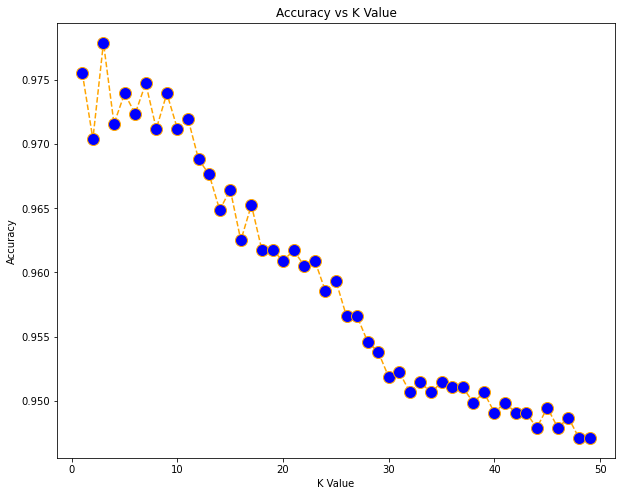

In [192]:
plt.figure(figsize=(10,8))

plt.plot(range(1,50),accuracy_rate,color='orange', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=12)
plt.title('Accuracy vs K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')

##### Conclusion - 

K=7 can be a good K value as per the chart above
It wont cause overfitting, and accuracy is also good.

#### Confusion Matrix

The confusion matrix can be plotted as per below code -

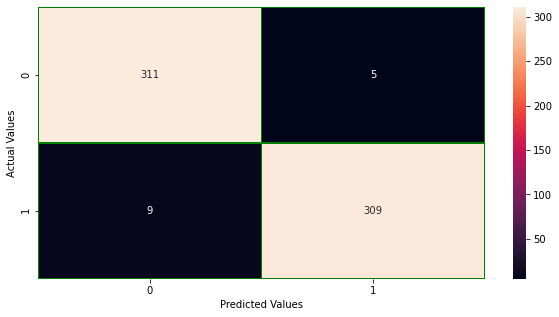

In [193]:
y_pred = knn_model.predict(x_test)                                               # Predicting for test data
conf_mat = confusion_matrix(y_test,y_pred)                                       # Getting confusuion matrix 

#Visualization Confusion Matrix
f, ax = plt.subplots(figsize=(10,5))
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="green",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

#### Checking Performance 

cross_validate can be used to get score values for our model.
The reuqired score metric can be passed in scoring parameter. 
Please check sklearn documentation in below link to know what all values this parameter can take- 

https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

In [194]:
scores_knn=cross_validate(knn_model,x_test,y_test,scoring=(['accuracy', 'precision','recall','f1']),cv=10)
scores_knn

Fitting 10 folds for each of 81 candidates, totalling 810 fits
Fitting 10 folds for each of 81 candidates, totalling 810 fits
Fitting 10 folds for each of 81 candidates, totalling 810 fits
Fitting 10 folds for each of 81 candidates, totalling 810 fits
Fitting 10 folds for each of 81 candidates, totalling 810 fits
Fitting 10 folds for each of 81 candidates, totalling 810 fits
Fitting 10 folds for each of 81 candidates, totalling 810 fits
Fitting 10 folds for each of 81 candidates, totalling 810 fits
Fitting 10 folds for each of 81 candidates, totalling 810 fits
Fitting 10 folds for each of 81 candidates, totalling 810 fits


{'fit_time': array([13.37574244, 12.78111053, 14.6759398 , 14.58899474, 13.12189865,
        13.92840219, 15.2765317 , 12.25243545, 13.13589048, 11.10214615]),
 'score_time': array([0.02098632, 0.02798247, 0.0449717 , 0.0409739 , 0.01798844,
        0.01099181, 0.02198625, 0.02098727, 0.03297997, 0.01998711]),
 'test_accuracy': array([0.953125  , 0.9375    , 0.984375  , 0.96875   , 1.        ,
        0.98412698, 0.96825397, 0.95238095, 0.9047619 , 0.95238095]),
 'test_precision': array([1.        , 0.9375    , 0.96969697, 0.94117647, 1.        ,
        1.        , 0.96875   , 1.        , 1.        , 1.        ]),
 'test_recall': array([0.90625   , 0.9375    , 1.        , 1.        , 1.        ,
        0.96774194, 0.96875   , 0.90625   , 0.8125    , 0.90625   ]),
 'test_f1': array([0.95081967, 0.9375    , 0.98461538, 0.96969697, 1.        ,
        0.98360656, 0.96875   , 0.95081967, 0.89655172, 0.95081967])}

In [195]:
print("Mean training time is :      "+ str(scores_knn['fit_time'].mean()))
print("Mean Accuracy is :           "+ str(scores_knn['test_accuracy'].mean()))
print("Mean Precision is :          "+ str(scores_knn['test_precision'].mean()))
print("Mean Recall is :             "+ str(scores_knn['test_recall'].mean()))
print("Mean F1 is :                 "+ str(scores_knn['test_f1'].mean()))


Mean training time is :      13.423909211158753
Mean Accuracy is :           0.9605654761904763
Mean Precision is :          0.9817123440285205
Mean Recall is :             0.9405241935483872
Mean F1 is :                 0.9593179652220778


In [196]:
# Performance Comparison 

print('*******************************Training time comparison***********************************')
print("Logistic Regression      :"+ str(scores_log_reg['fit_time'].mean()))
print("Decision Trees           :"+ str(scores_dtree['fit_time'].mean()))
print("KNN                      :"+ str(scores_knn['fit_time'].mean()))


print('*******************************Accuracy comparison***********************************')
print("Logistic Regression      :"+ str(scores_log_reg['test_accuracy'].mean()))
print("Decision Trees           :"+ str(scores_dtree['test_accuracy'].mean()))
print("KNN                      :"+ str(scores_knn['test_accuracy'].mean()))


print('*******************************Precision comparison***********************************')
print("Logistic Regression      :"+ str(scores_log_reg['test_precision'].mean()))
print("Decision Trees           :"+ str(scores_dtree['test_precision'].mean()))
print("KNN                      :"+ str(scores_knn['test_precision'].mean()))

print('*******************************Recall comparison***********************************')
print("Logistic Regression      :"+ str(scores_log_reg['test_precision'].mean()))
print("Decision Trees           :"+ str(scores_dtree['test_precision'].mean()))
print("KNN                      :"+ str(scores_knn['test_precision'].mean()))

print('*******************************F1 comparison***********************************')
print("Logistic Regression      :"+ str(scores_log_reg['test_f1'].mean()))
print("Decision Trees           :"+ str(scores_dtree['test_f1'].mean()))
print("KNN                      :"+ str(scores_knn['test_f1'].mean()))


*******************************Training time comparison***********************************
Logistic Regression      :6.6501950979232785
Decision Trees           :5.948728919029236
KNN                      :13.423909211158753
*******************************Accuracy comparison***********************************
Logistic Regression      :0.9637400793650792
Decision Trees           :0.9510912698412698
KNN                      :0.9605654761904763
*******************************Precision comparison***********************************
Logistic Regression      :0.9749816715542522
Decision Trees           :0.9573944805194806
KNN                      :0.9817123440285205
*******************************Recall comparison***********************************
Logistic Regression      :0.9749816715542522
Decision Trees           :0.9573944805194806
KNN                      :0.9817123440285205
*******************************F1 comparison***********************************
Logistic Regression      :0.96341

##### Conclusion

KNN algorithm provides best performance among all algorithms. 
The Accuracy is similar to logistic regression, but Precision an Recall are better. 
But a major drawback is that KNN model took almost double time that of Logistic Regression to train. 

Logistic Regression performed best overall, with good Performanc score as well as much lower training time as well. The balance is good. 


Decision Trees took the least time but Performance is worst among all. Although the difference in perfromance is not drastic as compared to Logistic Regression.